In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
import pandas
%matplotlib notebook

In [2]:
alpha = 0.1
def beta(beta):
    nul1 = (1 + alpha)*4 - ((4 + 1*1.6 - 2*0.5 - 3*0.2) + 2*beta)
    return nul1
beta = fsolve(beta, alpha)[0]
MMX = 1*12 + 1.6*1 + 0.5*16 + 0.2*14

In [3]:
Data = np.array(pandas.read_csv('Chemostat\Postma 1989\Postma 1989 rCO2.csv', header = None))
D = Data[:,0]
rCO2 = Data[:,1]/1000*MMX
rO2 = Data[:,2]/1000*MMX
YXS = -Data[:,3]*MMX/30
theta = 0

PO = 1.5

In [4]:
gammalys = []
for i in range(len(D)):
    S = np.matrix([[-1, 0, 0, 1, 1, 1, 1, 0],
                   [-2, -3, 0, 1.6, 8/3, 3, 0, 2],
                   [-1, 0, -2, 0.5, 1, 1/2, 2, 1],
                   [0, -1, 0, 0.2, 0, 0, 0, 0],
                   [1, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 1, 0]])
    C = np.array([0, 0, 0, 0, YXS[i]*D[i], D[i], rO2[i], rCO2[i]])
    r = np.linalg.solve(S, C)
    rATP = 1/2*r[5] + 2*PO*r[2] + 2/3*(r[6] - 1/2*r[5] - alpha*r[3])
    gamma = rATP/r[3]
    gammalys.append(gamma)
gamma = np.array(gammalys)

In [5]:
rATP = gamma*D*1000/MMX # mmol/g/h

<IPython.core.display.Javascript object>


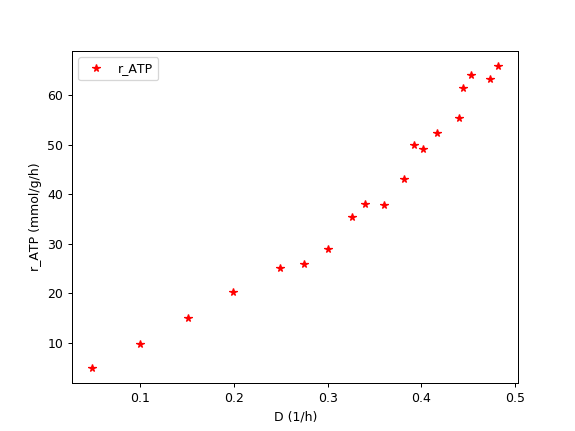

In [6]:
plt.figure(1)
plt.plot(D, rATP, 'r*', label = 'r_ATP')
plt.xlabel('D (1/h)')
plt.ylabel('r_ATP (mmol/g/h)')
plt.legend(loc = 'best')
plt.savefig('Chemostat/Postma 1989/r_ATP vs D.png', dpi = 300)
plt.show()

<IPython.core.display.Javascript object>


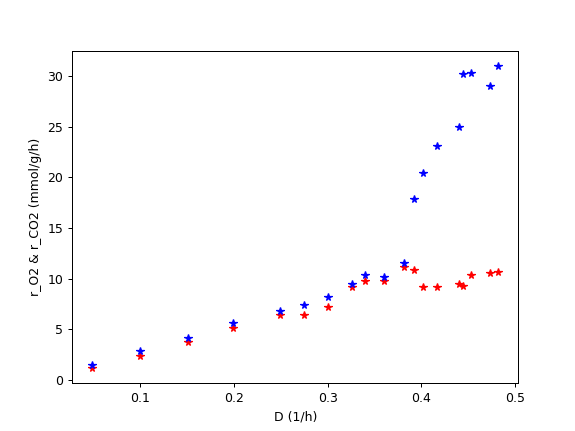

In [7]:
plt.figure(3)
plt.plot(D, rO2*1000/MMX, 'r*')
plt.plot(D, rCO2*1000/MMX, 'b*')
plt.xlabel('D (1/h)')
plt.ylabel('r_O2 & r_CO2 (mmol/g/h)')
plt.legend(loc = 'best')
plt.savefig('Chemostat/Postma 1989/r_O2 & r_CO2 vs D.png', dpi = 300)
plt.show()

In [8]:
df1 = pandas.DataFrame({'D': D,
                        'Y_XS': YXS*30/MMX,
                        'r_O2': rO2*1000/MMX,
                        'r_CO2': rCO2*1000/MMX,
                        'r_ATP': rATP})

df1.to_csv('Postma 1989.csv')